# <font color=#227C9D>Anticipez le retard de vol des avions - Nettoyage</font>

# <font color=#227C9D>Sommaire</font>
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Nettoyage](#Nettoyage)
    * [Profilage des donnees](#Profilage-des-donnees)
    * [Distributions](#Distributions)
    * [Suppressions](#Suppressions)
    * [Correlations](#Correlations)
    * [Boxplots](#Boxplots)

## <font color=#17C3B2>Configuration</font>

In [22]:
import matplotlib as mplt
import pandas as pd

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

pd.set_option('display.min_rows', 30)

## <font color=#17C3B2>Chargement des donnees</font>

In [2]:
import time
start=time.time()

In [3]:
import pandas as pd
coltypes={'YEAR':'int' , 'QUARTER':'int' , 'MONTH':'int', 'DAY_OF_MONTH':'int' , 'DAY_OF_WEEK':'int' , 'FL_DATE':'string' , 'UNIQUE_CARRIER':'string' , 'AIRLINE_ID':'float64', 'CARRIER':'string' , 'TAIL_NUM':'string' , 'FL_NUM':'float64' , 'ORIGIN_AIRPORT_ID':'float64' , 'ORIGIN_AIRPORT_SEQ_ID':'float64', 'ORIGIN_CITY_MARKET_ID':'float64' , 'ORIGIN':'string' , 'ORIGIN_CITY_NAME':'string' , 'ORIGIN_STATE_ABR':'string' , 'ORIGIN_STATE_FIPS':'float64', 'ORIGIN_STATE_NM':'string' , 'ORIGIN_WAC':'float64' , 'DEST_AIRPORT_ID':'float64' , 'DEST_AIRPORT_SEQ_ID':'float64' , 'DEST_CITY_MARKET_ID':'float64' , 'DEST':'string' , 'DEST_CITY_NAME':'string' , 'DEST_STATE_ABR':'string' , 'DEST_STATE_FIPS':'float64', 'DEST_STATE_NM':'string' , 'DEST_WAC':'float64', 'CRS_DEP_TIME':'float64', 'DEP_TIME':'float64' , 'DEP_DELAY':'float64', 'DEP_DELAY_NEW':'float64', 'DEP_DEL':'float64', 'DEP_DELAY_GROUP':'float64', 'DEP_TIME_BLK':'string' , 'TAXI_OUT':'float64' , 'WHEELS_OFF':'float64', 'WHEELS_ON':'float64', 'TAXI_IN':'float64', 'CRS_ARR_TIME':'float64', 'ARR_TIME':'float64' , 'ARR_DELAY':'float64', 'ARR_DELAY_NEW':'float64', 'ARR_DEL':'float64', 'ARR_DELAY_GROUP':'float64', 'ARR_TIME_BLK':'string' , 'CANCELLED':'float64', 'CANCELLATION_CODE':'string' , 'DIVERTED':'float64', 'CRS_ELAPSED_TIME':'float64', 'ACTUAL_ELAPSED_TIME':'float64', 'AIR_TIME':'float64', 'FLIGHTS':'float64', 'DISTANCE':'float64', 'DISTANCE_GROUP':'float64', 'CARRIER_DELAY':'float64', 'WEATHER_DELAY':'float64', 'NAS_DELAY':'float64', 'SECURITY_DELAY':'float64', 'LATE_AIRCRAFT_DELAY':'float64', 'FIRST_DEP_TIME':'float64', 'TOTAL_ADD_GTIME':'float64', 'LONGEST_ADD_GTIME':'float64'}
df01=pd.read_csv("../Dataset/2016_01.csv",sep=",",dtype=coltypes)
df02=pd.read_csv("../Dataset/2016_02.csv",sep=",",dtype=coltypes)
df03=pd.read_csv("../Dataset/2016_03.csv",sep=",",dtype=coltypes)
#df04=pd.read_csv("../Dataset/2016_04.csv",sep=",",dtype=coltypes)
#df05=pd.read_csv("../Dataset/2016_05.csv",sep=",",dtype=coltypes)
#df06=pd.read_csv("../Dataset/2016_06.csv",sep=",",dtype=coltypes)
#df07=pd.read_csv("../Dataset/2016_07.csv",sep=",",dtype=coltypes)
#df08=pd.read_csv("../Dataset/2016_08.csv",sep=",",dtype=coltypes)
#df06=pd.read_csv("../Dataset/2016_06.csv",sep=",",dtype={'CANCELLATION_CODE': 'string'})

#df=pd.concat([df01,df02,df03,df05,df06,df07,df08])
df=pd.concat([df01,df02,df03], ignore_index=True) #ignorer les index existants et définit un nouvel index à partir de 0 pour le nouvel index

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348838 entries, 0 to 1348837
Data columns (total 65 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   1348838 non-null  int64  
 1   QUARTER                1348838 non-null  int64  
 2   MONTH                  1348838 non-null  int64  
 3   DAY_OF_MONTH           1348838 non-null  int64  
 4   DAY_OF_WEEK            1348838 non-null  int64  
 5   FL_DATE                1348838 non-null  string 
 6   UNIQUE_CARRIER         1348838 non-null  string 
 7   AIRLINE_ID             1348838 non-null  float64
 8   CARRIER                1348838 non-null  string 
 9   TAIL_NUM               1342595 non-null  string 
 10  FL_NUM                 1348838 non-null  float64
 11  ORIGIN_AIRPORT_ID      1348838 non-null  float64
 12  ORIGIN_AIRPORT_SEQ_ID  1348838 non-null  float64
 13  ORIGIN_CITY_MARKET_ID  1348838 non-null  float64
 14  ORIGIN            

In [5]:
pd.set_option('display.max_columns', None)
df[df['MONTH']==3].sample(15)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
1285874,2016,1,3,18,5,2016-03-18,AA,19805.0,AA,N939UW,799.0,14100.0,1410002.0,34100.0,PHL,"Philadelphia, PA",PA,42.0,Pennsylvania,23.0,13303.0,1330303.0,32467.0,MIA,"Miami, FL",FL,12.0,Florida,33.0,1735.0,1838.0,63.0,63.0,1.0,4.0,1700-1759,21.0,1859.0,2125.0,10.0,2029.0,2135.0,66.0,66.0,1.0,4.0,2000-2059,0.0,<NA>,0.0,174.0,177.0,146.0,1.0,1013.0,5.0,13.0,0.0,3.0,0.0,50.0,NaN,NaN,NaN,NaN
995591,2016,1,3,1,2,2016-03-01,WN,19393.0,WN,N465WN,322.0,13495.0,1349503.0,33495.0,MSY,"New Orleans, LA",LA,22.0,Louisiana,72.0,15016.0,1501603.0,31123.0,STL,"St. Louis, MO",MO,29.0,Missouri,64.0,650.0,649.0,-1.0,0.0,0.0,-1.0,0600-0659,9.0,658.0,818.0,5.0,835.0,823.0,-12.0,0.0,0.0,-1.0,0800-0859,0.0,<NA>,0.0,105.0,94.0,80.0,1.0,604.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065755,2016,1,3,20,7,2016-03-20,WN,19393.0,WN,N568WN,521.0,13796.0,1379604.0,32457.0,OAK,"Oakland, CA",CA,6.0,California,91.0,10800.0,1080003.0,32575.0,BUR,"Burbank, CA",CA,6.0,California,91.0,1630.0,1850.0,140.0,140.0,1.0,9.0,1600-1659,25.0,1915.0,2004.0,3.0,1730.0,2007.0,157.0,157.0,1.0,10.0,1700-1759,0.0,<NA>,0.0,60.0,77.0,49.0,1.0,325.0,2.0,60.0,0.0,17.0,0.0,80.0,1744.0,28.0,28.0,NaN
1058383,2016,1,3,20,7,2016-03-20,WN,19393.0,WN,N946WN,1215.0,11259.0,1125903.0,30194.0,DAL,"Dallas, TX",TX,48.0,Texas,74.0,11066.0,1106603.0,31066.0,CMH,"Columbus, OH",OH,39.0,Ohio,44.0,1940.0,1942.0,2.0,2.0,0.0,0.0,1900-1959,13.0,1955.0,2252.0,7.0,2255.0,2259.0,4.0,4.0,0.0,0.0,2200-2259,0.0,<NA>,0.0,135.0,137.0,117.0,1.0,919.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1235262,2016,1,3,24,4,2016-03-24,AA,19805.0,AA,N3HLAA,300.0,13930.0,1393004.0,30977.0,ORD,"Chicago, IL",IL,17.0,Illinois,41.0,12889.0,1288903.0,32211.0,LAS,"Las Vegas, NV",NV,32.0,Nevada,85.0,1320.0,1325.0,5.0,5.0,0.0,0.0,1300-1359,13.0,1338.0,1503.0,7.0,1518.0,1510.0,-8.0,0.0,0.0,-1.0,1500-1559,0.0,<NA>,0.0,238.0,225.0,205.0,1.0,1514.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210971,2016,1,3,10,4,2016-03-10,UA,19977.0,UA,N33262,354.0,14679.0,1467903.0,33570.0,SAN,"San Diego, CA",CA,6.0,California,91.0,11292.0,1129202.0,30325.0,DEN,"Denver, CO",CO,8.0,Colorado,82.0,1327.0,1336.0,9.0,9.0,0.0,0.0,1300-1359,10.0,1346.0,1635.0,5.0,1649.0,1640.0,-9.0,0.0,0.0,-1.0,1600-1659,0.0,<NA>,0.0,142.0,124.0,109.0,1.0,853.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889895,2016,1,3,11,5,2016-03-11,DL,19790.0,DL,N555NW,1453.0,11433.0,1143302.0,31295.0,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,13487.0,1348702.0,31650.0,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63.0,2045.0,2041.0,-4.0,0.0,0.0,-1.0,2000-2059,17.0,2058.0,2118.0,4.0,2145.0,2122.0,-23.0,0.0,0.0,-2.0,2100-2159,0.0,<NA>,0.0,120.0,101.0,80.0,1.0,528.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099980,2016,1,3,29,2,2016-03-29,WN,19393.0,WN,N522SW,1257.0,11259.0,1125903.0,30194.0,DAL,"Dallas, TX",TX,48.0,Texas,74.0,10423.0,1042302.0,30423.0,AUS,"Austin, TX",TX,48.0,Texas,74.0,1840.0,1846.0,6.0,6.0,0.0,0.0,1800-1859,8.0,1854.0,1927.0,5.0,1935.0,1932.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,<NA>,0.0,55.0,46.0,33.0,1.0,189.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1254234,2016,1,3,13,7,2016-03-13,AA,19805.0,AA,N3MLAA,1457.0,14100.0,1410002.0,34100.0,PHL,"Philadelphia, PA",PA,42.0,Penns

## <font color=#17C3B2>Nettoyage</font>

### <font color=#FFCB77>Profilage des donnees</font>

In [6]:
#%%writefile /Users/hui-guan/Documents/Developpement/Jupyter/Lib/outilsEDA.py
#%load /Users/hui-guan/Documents/Developpement/Jupyter/Lib/outilsEDA.py
#%run outilsEDA.py
#%load outilsEDA.py
import pandas as pd
import numpy as np

def profil(df):
    """
    Fonction qui retourne le profil des données d'un dataframe (moyenne, ecart type, min, max, valeurs manquantes, valeurs uniques)

    Parameters
    ----------
    df : DataFrame
        un DataFrame de données

    Returns
    -------
    result : DataFrame
        un DataFrame de profil, contenant un résumé statistique des données
    """
    
    dfValeursManquantes=pd.concat([df.isna().sum(),100*df.isna().sum()/len(df)],axis=1,keys=["missing_values","%_missing_values"])
    dfValeursUniques=pd.concat([df.nunique(),100*(df.nunique()/len(df))],axis=1,keys=["unique_values","%_unique_values"])
    dfTypes=pd.DataFrame({'type':df.dtypes})
    result=df.describe(include='all').T
    result=result.merge(dfTypes,left_index=True,right_index=True)
    result=result.merge(dfValeursManquantes,left_index=True,right_index=True)
    result=result.merge(dfValeursUniques,left_index=True,right_index=True)
    return result

def summarizeFrequenciesDf(df,threshold):
    """
    Fonction mode qui agrege les variables qui sont sous un seuil 'threshold'(pour les très gros dataframe qui ont du mal à plotter)

    Parameters
    ----------
    df : DataFrame
        un DataFrame de données
    threshold: Int
        seuil au dessous duquel le comptage des observations sont agrégées dans la catégorie 'autres'

    Returns
    -------
    result : DataFrame
        un DataFrame contenant le comptage des observations au dessus du seuil et tout le reste dans la catégorie 'Autres'
    """

    dfFrequencies=df.value_counts()
    dfNormalizedFrequencies=df.value_counts(normalize=True) # frequence normalisée des valeurs de chaque variable
    mask = dfNormalizedFrequencies>threshold # masque sur les fréquences > seuil
    dfTail= dfFrequencies.loc[~mask].sum()
    dfFrequencies=dfFrequencies.loc[mask] # filtre sur les fréquences < seuil
    dfFrequencies['Autres']=dfTail # ajout des fréquences > seuil agregées dans la categorie 'Autre'
    return pd.DataFrame(dfFrequencies)

def plotCategoricalDistributions(plt,df,nrows,ncols,subfigwidth,subfigheight):
    """
    Fonction affiche les distributions des variables categorielles d'un DataFrame

    Parameters
    ----------
    plt: plot
        un objet pyplot qui affiche les graphiques
    df : DataFrame
        un DataFrame de données
    nrows: Int
        nombre de lignes des sous-figures
    ncols: Int
        nombre de colonnes des sous-figures
    subfigwidth: Int
        largeur des sous-figures
    subfigheight: Int
        hauteur des sous-figures

    
    Returns
    -------
    Pas de retours, c'est une procédure d'affichage

    """
    dfCategorical=df.select_dtypes(include=['object','string', 'category'])
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(subfigwidth,subfigheight))

    # Titre
    fig.suptitle("Distribution Variables Categorielles", fontsize=20)
    fig.subplots_adjust(top=1.5)
    
    # axes est un tableau à 2 dimensions: lignes, colonnes
    # pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
    axes=axes.flatten()
    
    # espace vertical entre les rangées de sous graphiques
    plt.tight_layout(pad=3)
    
    i=0
    for x in dfCategorical.columns:
        # passe les labels sur l'axe des x en arriere plan
        axes[i].xaxis.label.set_visible(False)
        
        # On classe dans la categorie "Autres" les variables sous le seuil de 0,5% de frequence d'observation,
        dfCurrent=summarizeFrequenciesDf(dfCategorical[x],0.005)
    
        axes[i].bar(dfCurrent[x].index,dfCurrent[x],color='#ee6352')
        axes[i].tick_params(axis='x', rotation=-90)
        axes[i].set_title(x,color='#3fa7d6')
    
        i=i+1
        
def plotQuantitativeDistributions(plt,df,nrows,ncols,subfigwidth,subfigheight):
    """
    Fonction affiche les distributions des variables quantitatives d'un DataFrame

    Parameters
    ----------
    plt: plot
        un objet pyplot qui affiche les graphiques
    df : DataFrame
        un DataFrame de données
    nrows: Int
        nombre de lignes des sous-figures
    ncols: Int
        nombre de colonnes des sous-figures
    subfigwidth: Int
        largeur des sous-figures
    subfigheight: Int
        hauteur des sous-figures
    
    Returns
    -------
    Pas de retours, c'est une procédure d'affichage

    """
    dfQuantitative=df.select_dtypes(exclude=['object','string', 'category'])
    dfQSkew=dfQuantitative.skew(skipna = True).to_frame('SKEW')
    dfQColumnsSorted=dfQSkew.sort_values(by='SKEW',ascending=False).T.columns #tri des colonnes par valeur de skew

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(subfigwidth,subfigheight))
    
    # Titre
    fig.suptitle("Distribution Variables Quantitatives", fontsize=20)
    fig.subplots_adjust(top=1.5)
    
    # axes est un tableau à 2 dimensions: lignes, colonnes
    # pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
    axes=axes.flatten()
    
    # espace vertical entre les rangées de sous graphiques
    plt.tight_layout(pad=3)
    
    dfQuantitative
    i=0
    for x in dfQColumnsSorted:
        #dfCurrent=dfNumerical[x].sample(1000,replace=True).sort_index() #optimisation pour les large datasets
        dfCurrent=dfQuantitative[x].dropna(axis=0)
        # passe les labels sur l'axe des x en arriere plan
        axes[i].xaxis.label.set_visible(False)    
        
        axes[i].hist(dfCurrent,color='#3fa7d6')
        axes[i].tick_params(axis='x', rotation=-90)
        axes[i].set_title(x,color='#ee6352')
    
        i=i+1
        
def plotCorrelationHeatmap(plt,df):
    """
    Fonction affiche la heatmap des correlation d'un DataFrame

    Parameters
    ----------
    plt: plot
        un objet pyplot qui affiche les graphiques
    df : DataFrame
        un DataFrame de données
    
    Returns
    -------
    Pas de retours, c'est une procédure d'affichage

    """
    dfCorr=df.corr()
    plt.rcParams["figure.figsize"] = (10,10)
    plt.matshow(dfCorr,cmap='coolwarm',interpolation='nearest')
    plt.xticks(range(len(dfCorr.columns)), dfCorr.columns, size='small',rotation='vertical');
    plt.yticks(range(len(dfCorr.columns)), dfCorr.columns, size='small');
    
def plotBoxes(plt,df,nrows,ncols):
    """
    Fonction affiche les boites à moustache des variables quantitatives d'un DataFrame

    Parameters
    ----------
    plt: plot
        un objet pyplot qui affiche les graphiques
    df : DataFrame
        un DataFrame de données
    nrows: Int
        nombre de lignes des sous-figures
    ncols: Int
        nombre de colonnes des sous-figures
    
    Returns
    -------
    Pas de retours, c'est une procédure d'affichage
    """

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(14,20))
    
    # espace vertical entre les rangées de sous graphiques
    plt.tight_layout(pad=3)


    # axes est un tableau à 2 dimensions: lignes, colonnes
    # pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
    axes=axes.flatten()
    
    i=0
    for x in df.columns:
            axes[i].boxplot(df[x].dropna())
            axes[i].set_title(x,color='#3fa7d6')
            i+=1

def plotPairs(plt,df,pairs,nrows,ncols):
    """
    Fonction affiche les diagramme de dispersion d'un DataFrame par paires 

    Parameters
    ----------
    plt: plot
        un objet pyplot qui affiche les graphiques
    df : DataFrame
        un DataFrame de données
    pairs: Array of Arrays
        un tableau de tableaux (couples de variables)
    nrows: Int
        nombre de lignes des sous-figures
    ncols: Int
        nombre de colonnes des sous-figures
    
    Returns
    -------
    Pas de retours, c'est une procédure d'affichage
    """    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(18,20))
    
    # espace vertical entre les rangées de sous graphiques
    plt.subplots_adjust(hspace=.5)
    
    # axes est un tableau à 2 dimensions: lignes, colonnes
    # pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
    axes=axes.flatten()
    
    i=0
    for p in pairs:
            #print(f"{p[0]}:{p[1]}")
            axes[i].plot(df[p[0]].sample(10000),df[p[1]].sample(10000),'o',color="#59cd90")
            axes[i].set_title(p[0]+" | "+p[1],color='#3fa7d6')
            i+=1  
from sklearn.linear_model import LinearRegression
def compute_vif(X, target_index):
    """
    implementation similaire à statsmodel variance_inflation_factor
    avec quelques améliorations:
    1. inclue l'interception par defaut
    2. evite les erreurs de division float (division par 0)

    L'une des mesures statistiques les plus largement utilisées pour détecter la multicolinéarité parmi les variables numériques est le facteur d'inflation de la variance (VIF).
    Il estime à quel point la variance d'un coefficient est «gonflée» en raison de la dépendance linéaire avec d'autres predicateurs.
    Le VIF peut être calculé pour chaque prédicateur en effectuant une régression linéaire de ce predicateur sur tous les autres predicateurs.
    VIF = 1/(1-R^2)
    
    pour interpréter le facteur d'inflation de variance:
    1 = non corrélé.
    entre 1 et 5 = moyennement corrélé.
    > 5 = hautement corrélé
    
    References
    ----------
    http://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
    """
    n_features = X.shape[1]
    X_target = X.iloc[:, target_index]
    mask = np.arange(n_features) != target_index
    X_not_target = X.iloc[:, mask]

    linear = LinearRegression()
    linear.fit(X_not_target, X_target)
    rsquared = linear.score(X_not_target, X_target)
    vif = 1. / (1. - rsquared + 1e-5)
    return vif

# calcul de la multicolinéarité des variables
#vif = [compute_vif(X, index) for index in range(X.shape[1])]
#dfVif=pd.DataFrame({
#    'Variable':pd.Series(X.columns),
#    'Vif':pd.Series(vif)
#})
#dfVif.sort_values(by='Vif')

def maskOutliers(s):
    """
    Fonction qui retourne le mask qui retourne les lignes d'une Serie, correspondant aux outliers

    Parameters
    ----------
    s : pandas Series
        une Serie de valeurs numériques

    Returns
    -------
    mask : Series
        une Serie de booleens correspondant au masque qui retourne les valeurs atypiques/Outliers
    """
    # premier Quantile
    Q1 = s.quantile(0.25)
    # 3e quantile
    Q3 = s.quantile(0.75)
    # Interquantile
    IQR = Q3 - Q1
    
    # les outliers sont toutes les valeurs qui sont inférieures à Q1-1.5*IQR et supérieure à  Q3+1.5*IQR
    mask=(s < (Q1 - 1.5 * IQR)) |(s > (Q3 + 1.5 * IQR))
    return mask

In [7]:
dfProfil=profil(df)

In [8]:
dfProfil.head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,type,missing_values,%_missing_values,unique_values,%_unique_values
YEAR,1348838.0,NaN,NaN,NaN,2016.0,0.0,2016.0,2016.0,2016.0,2016.0,2016.0,int64,0,0.0,1,0.000074
QUARTER,1348838.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,int64,0,0.0,1,0.000074
MONTH,1348838.0,NaN,NaN,NaN,2.024684,0.827725,1.0,1.0,2.0,3.0,3.0,int64,0,0.0,3,0.000222
DAY_OF_MONTH,1348838.0,NaN,NaN,NaN,15.702066,8.776683,1.0,8.0,16.0,23.0,31.0,int64,0,0.0,31,0.002298
DAY_OF_WEEK,1348838.0,NaN,NaN,NaN,3.920426,1.986466,1.0,2.0,4.0,6.0,7.0,int64,0,0.0,7,0.000519


### <font color=#FFCB77>Distributions</font>

Text(0, 0.5, 'Variable')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


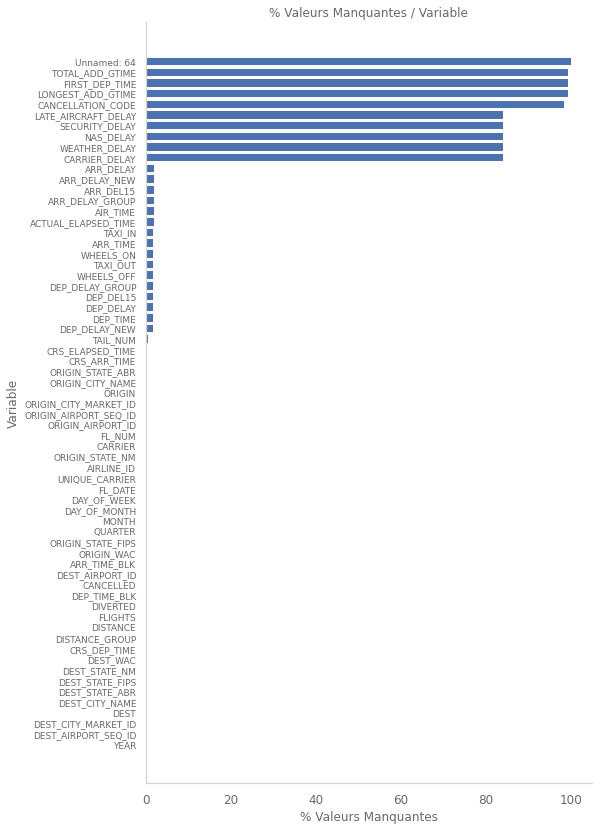

In [9]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,14)
plt.rcParams["ytick.labelsize"]=9
plt.rcParams["xtick.labelsize"]=12

profilTrie=dfProfil.sort_values("%_missing_values",ascending=True) #Tri

plt.barh(profilTrie.index,profilTrie["%_missing_values"])

# Titre et libelles
plt.title('% Valeurs Manquantes / Variable')
plt.xlabel('% Valeurs Manquantes')
plt.ylabel('Variable')

Text(0, 0.5, '% Valeurs Uniques')

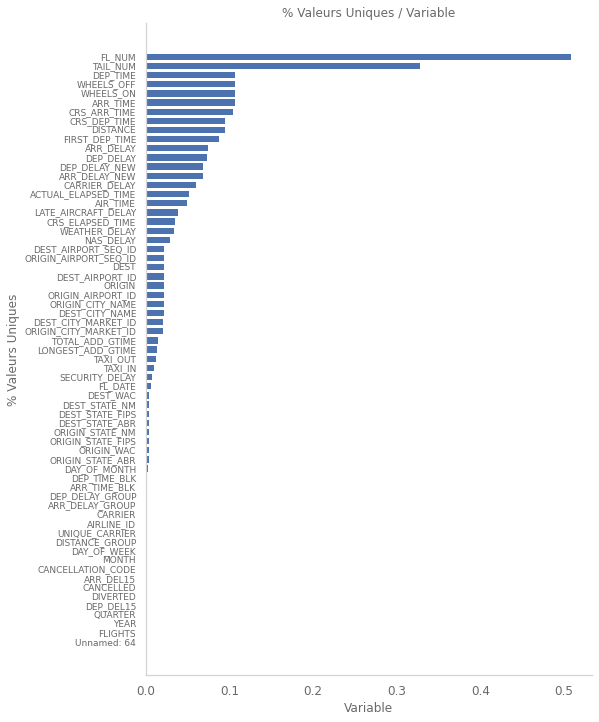

In [10]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,12)
plt.rcParams["ytick.labelsize"]=9
plt.rcParams["xtick.labelsize"]=12

profilTrie=dfProfil.sort_values("%_unique_values",ascending=True) #Tri
plt.barh(profilTrie.index,profilTrie["%_unique_values"])

# Titre et libelles
plt.title('% Valeurs Uniques / Variable')
plt.xlabel('Variable')
plt.ylabel('% Valeurs Uniques')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


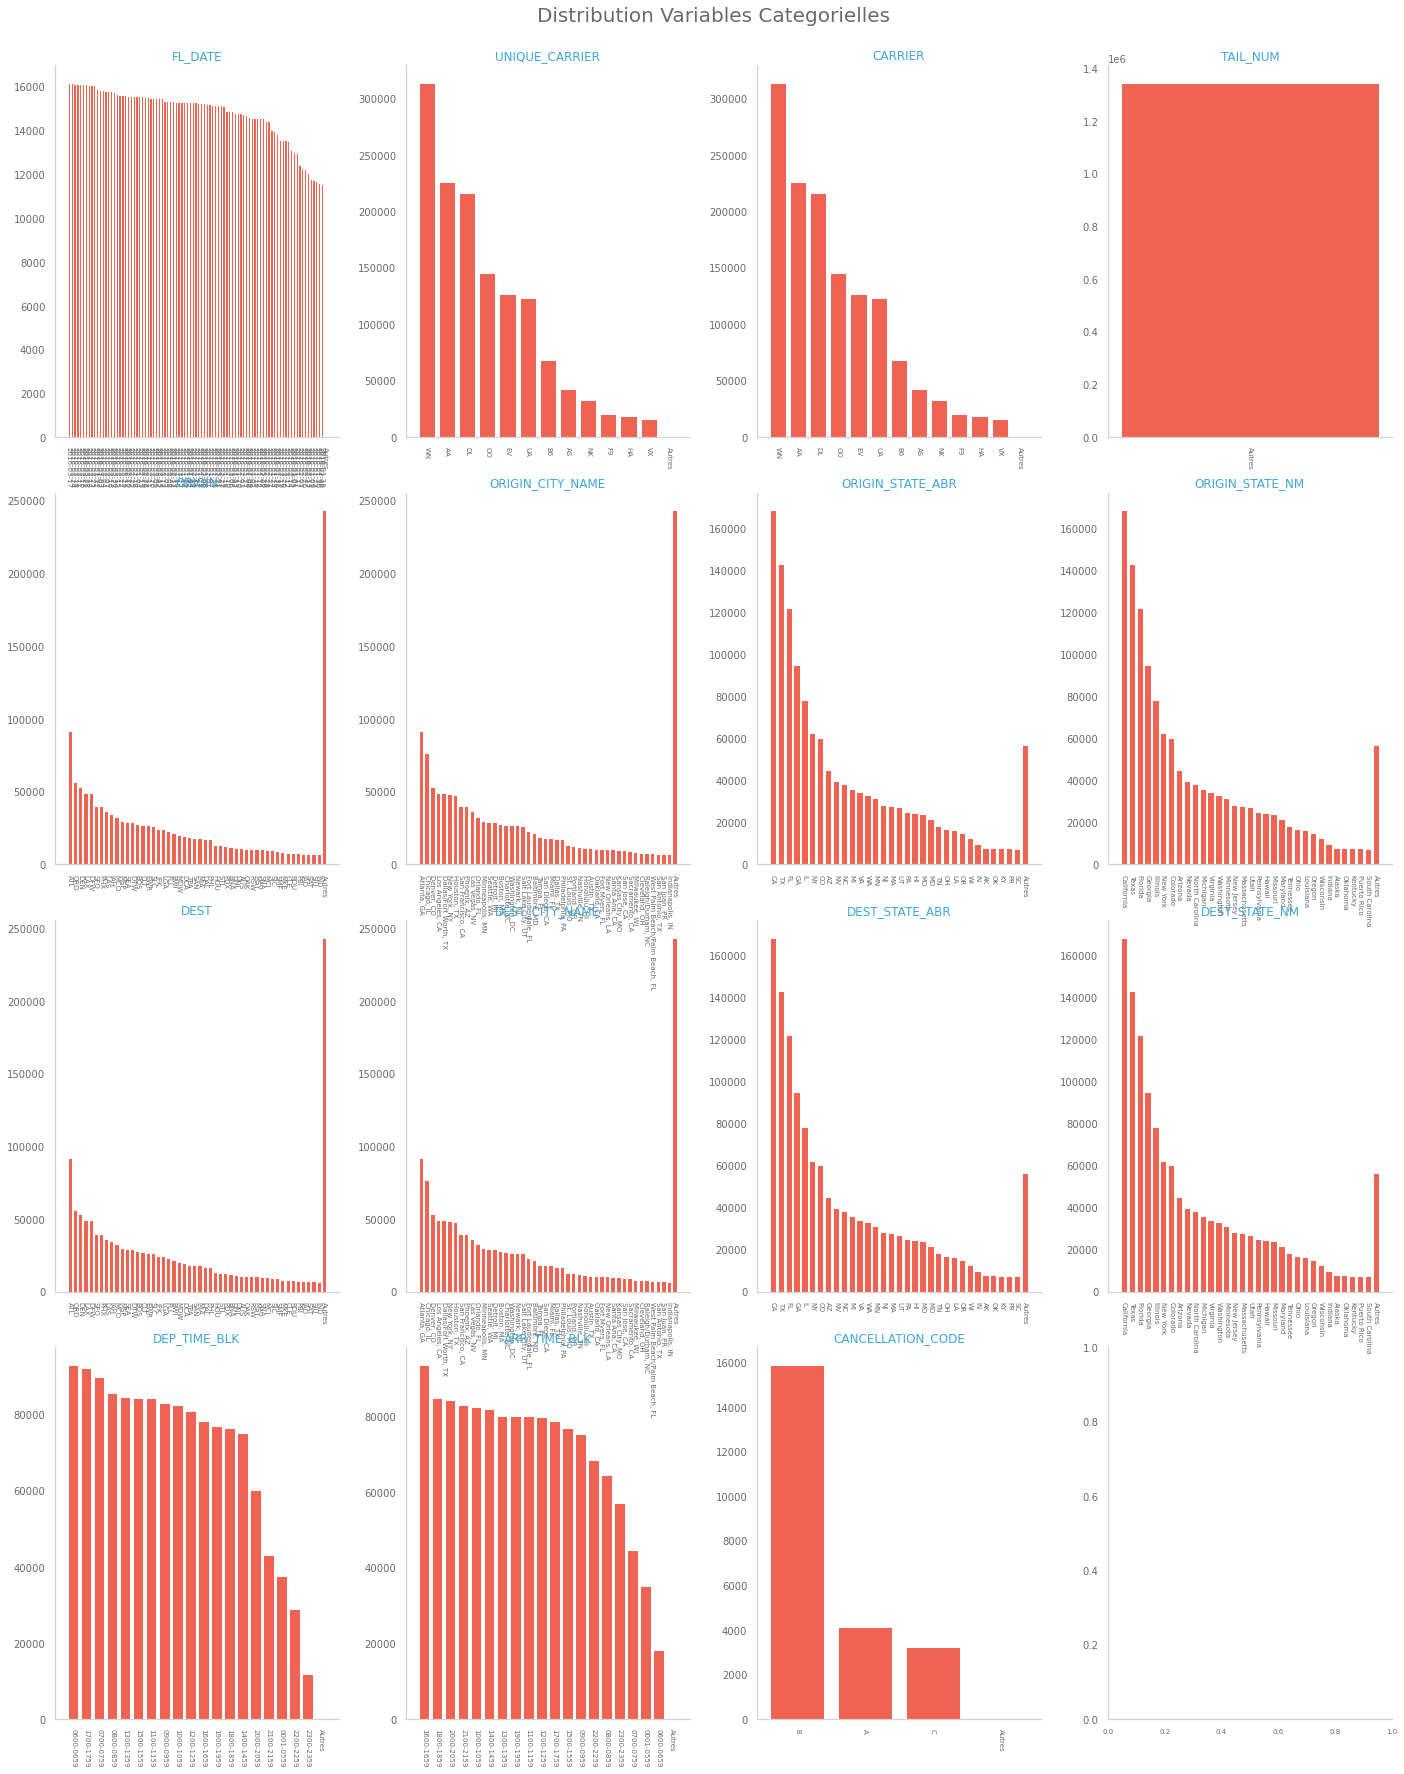

In [11]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (200,250)
plt.rcParams["xtick.labelsize"]=7
plt.rcParams["ytick.labelsize"]=10
plotCategoricalDistributions(plt,df,4,4,20,25)

plt.show()

On constate que les variables suffixées en "_city_name" et la concaténation des variables en "_NM" et en "_ABR"  
=> on ne garde que les "city_name  
=> on supprime également les variables "FIPS" (code postal des etats)  
=> on supprimera également les variables suffixées en "_BLK" (car le site indique  que le champ correspond à "ComputerReservationSystem Arrival/Departure Time Block, Hourly Intervals", en doublon avec la variable CRS_DEP/ARR_TIME)
=> on supprimera également les variables suffixées en "_GROUP" car ces variables regroupent d'autres variables par intervalle

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


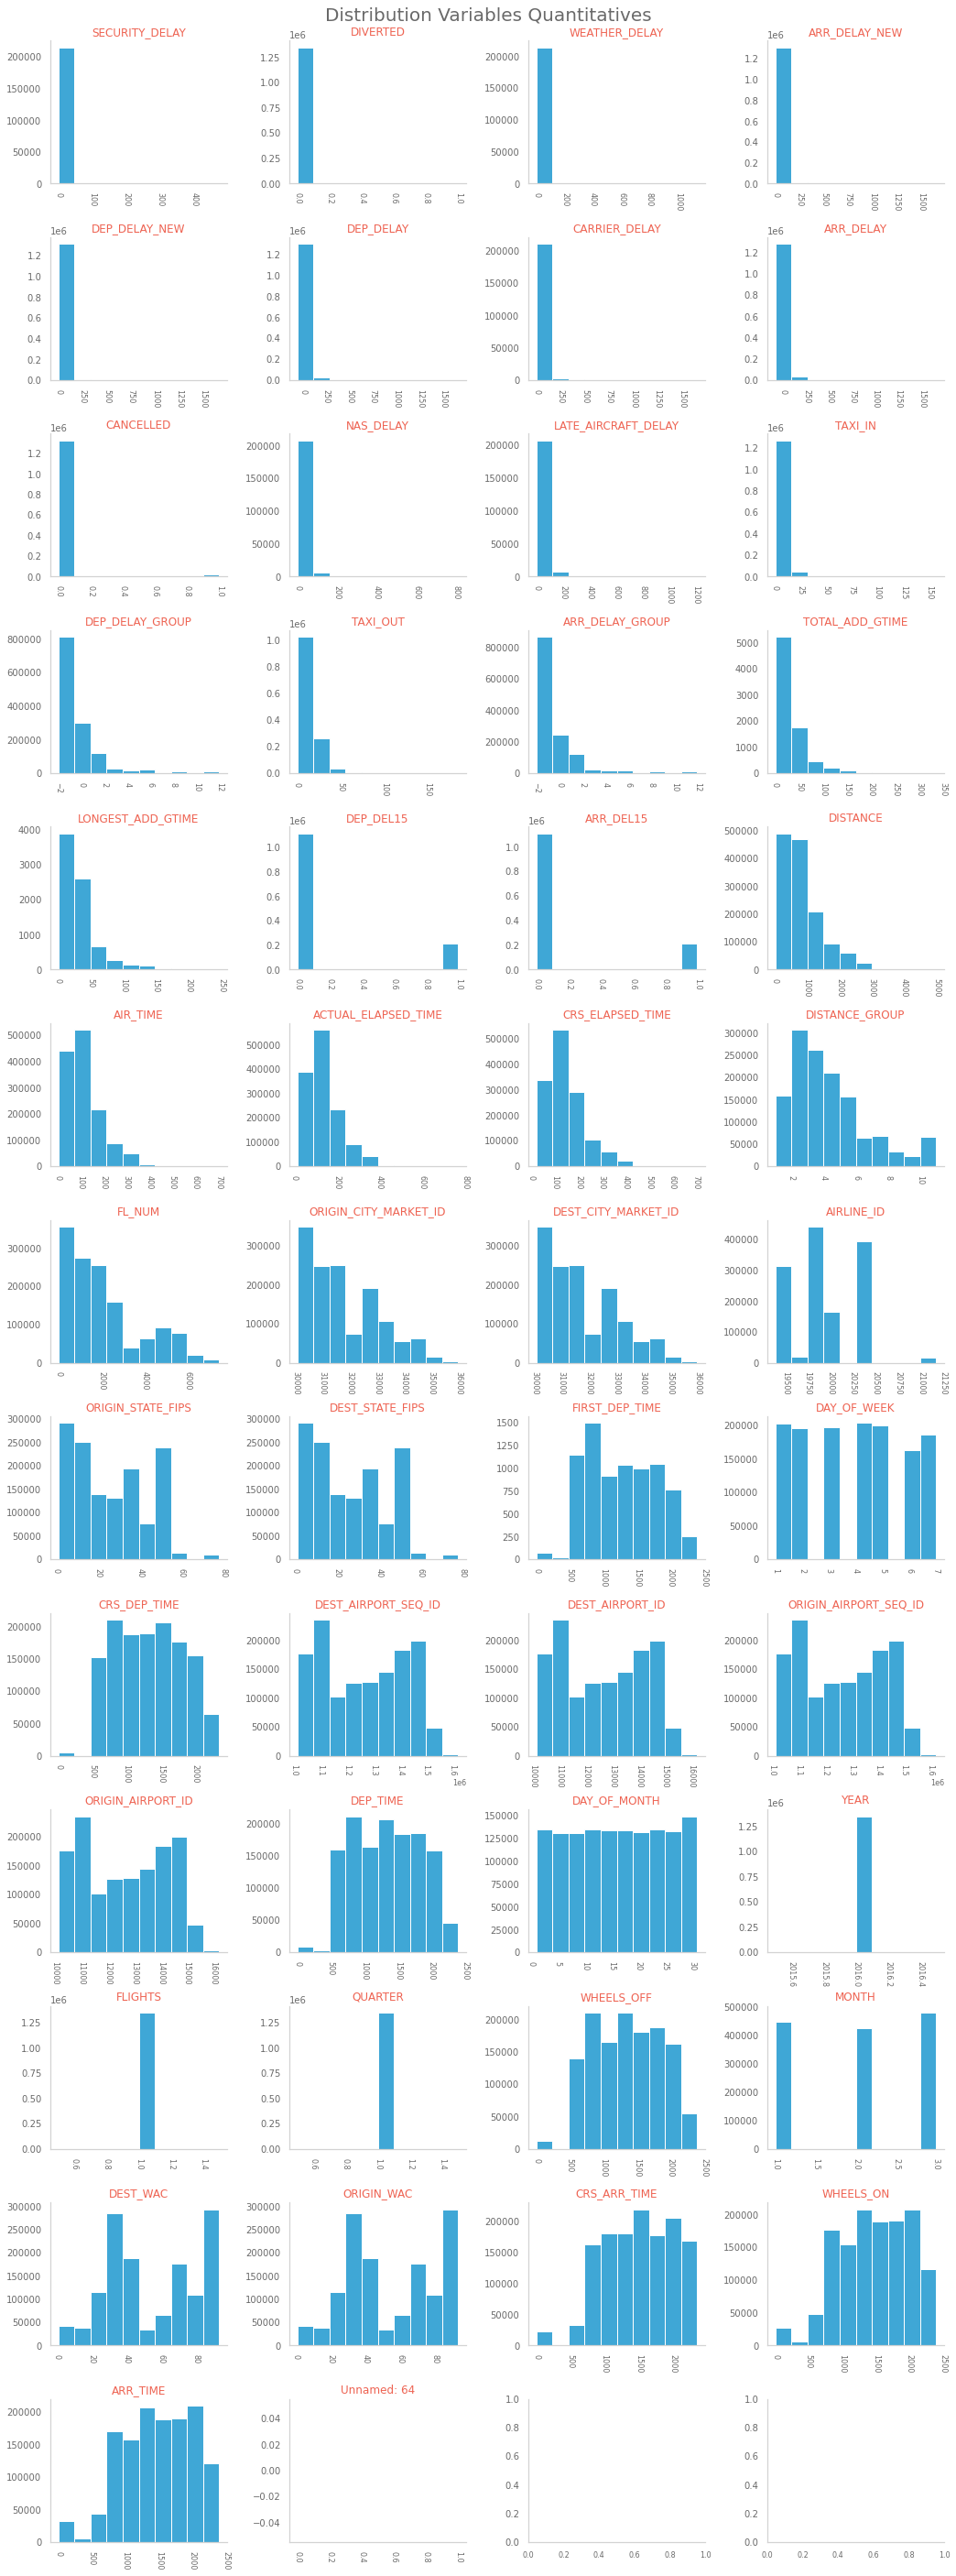

In [12]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (200,40)
plt.rcParams["xtick.labelsize"]=8
plt.rcParams["ytick.labelsize"]=10

plotQuantitativeDistributions(plt,df,13,4,15,40)

plt.show()

On constate une distribution identique sur les airport_seq_id / airport_id d'origine ou de destination,  
de plus le site précise :
"Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused."  
=> on ne garde que l'AIRPORT_SEQ_ID et on supprimer l'AIRPORT_ID (qui peut etre en doublon au fil des ans   
=> on supprimera également la variable vide inutile "unnamed: 64"  
=> on supprimera également les variables ORIGIN/DEST_CITY_MARKET_ID qui indique juste l'id city market (on a deja l 'ORIGIN/DEST_CITY_NAME qui indique la ville)  
=> on gardera les variables suffixées en "_WAC" (world area code) qui  sont les identifiants des destinations ou départs (ces variables peuvent servir d'etiquette pour localiser les vols)

On remarque aussi les variables DEP_DELAY_NEW et DEP_DELAY, laquelle faut-il conserver?

### <font color=#FFCB77>Suppressions</font>

In [13]:
import copy

# suppression des variables > 85% valeurs manquantes
dfCleaned=copy.deepcopy(df.drop(["Unnamed: 64", "TOTAL_ADD_GTIME", "FIRST_DEP_TIME", "LONGEST_ADD_GTIME", "CANCELLATION_CODE", "LATE_AIRCRAFT_DELAY", "SECURITY_DELAY", "NAS_DELAY", "WEATHER_DELAY", "CARRIER_DELAY"],1))
# suppression des variables avec peu/pas de valeurs distinctes
dfCleaned=dfCleaned.drop(["FLIGHTS","YEAR","QUARTER","ORIGIN_STATE_ABR","ORIGIN_STATE_NM","ORIGIN_STATE_ABR","DEST_STATE_ABR","DEST_STATE_NM","ORIGIN","DEST","DEST_AIRPORT_ID","ORIGIN_AIRPORT_ID","DEST_STATE_FIPS","ORIGIN_STATE_FIPS","ORIGIN_CITY_MARKET_ID","DEST_CITY_MARKET_ID","ARR_DEL15","DEP_TIME_BLK","ARR_TIME_BLK","DEP_DELAY_GROUP","ARR_DELAY_GROUP","DISTANCE_GROUP","ARR_DELAY_NEW","DEP_DELAY_NEW" ],1)

### <font color=#FFCB77>Correlations</font>

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


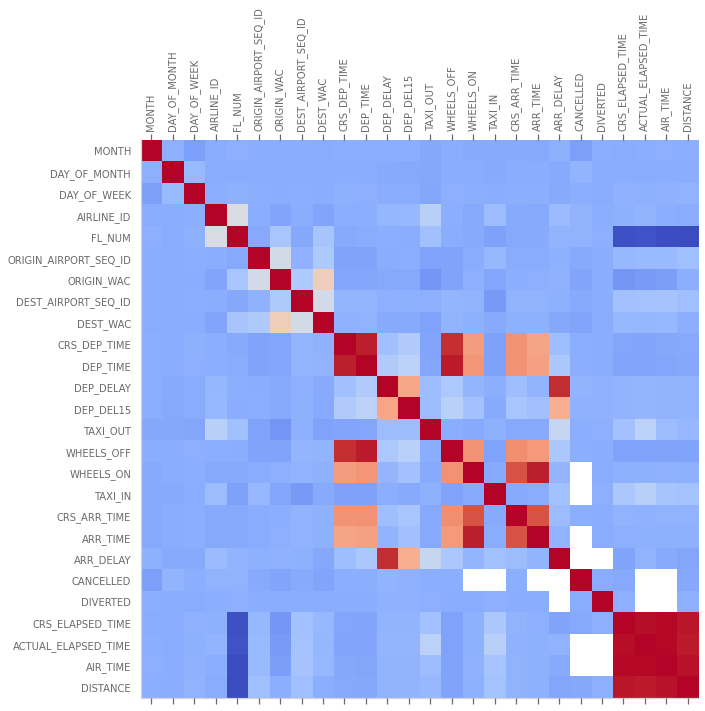

In [14]:
dfQuantitative=dfCleaned.select_dtypes(include=["datetime","number","bool","float64"])
plotCorrelationHeatmap(plt,dfQuantitative)

### <font color=#FFCB77>Boxplots</font>

Regardons les diagrammes de dispersions des variables les plus corrélées (en rouge sur la heatmap)

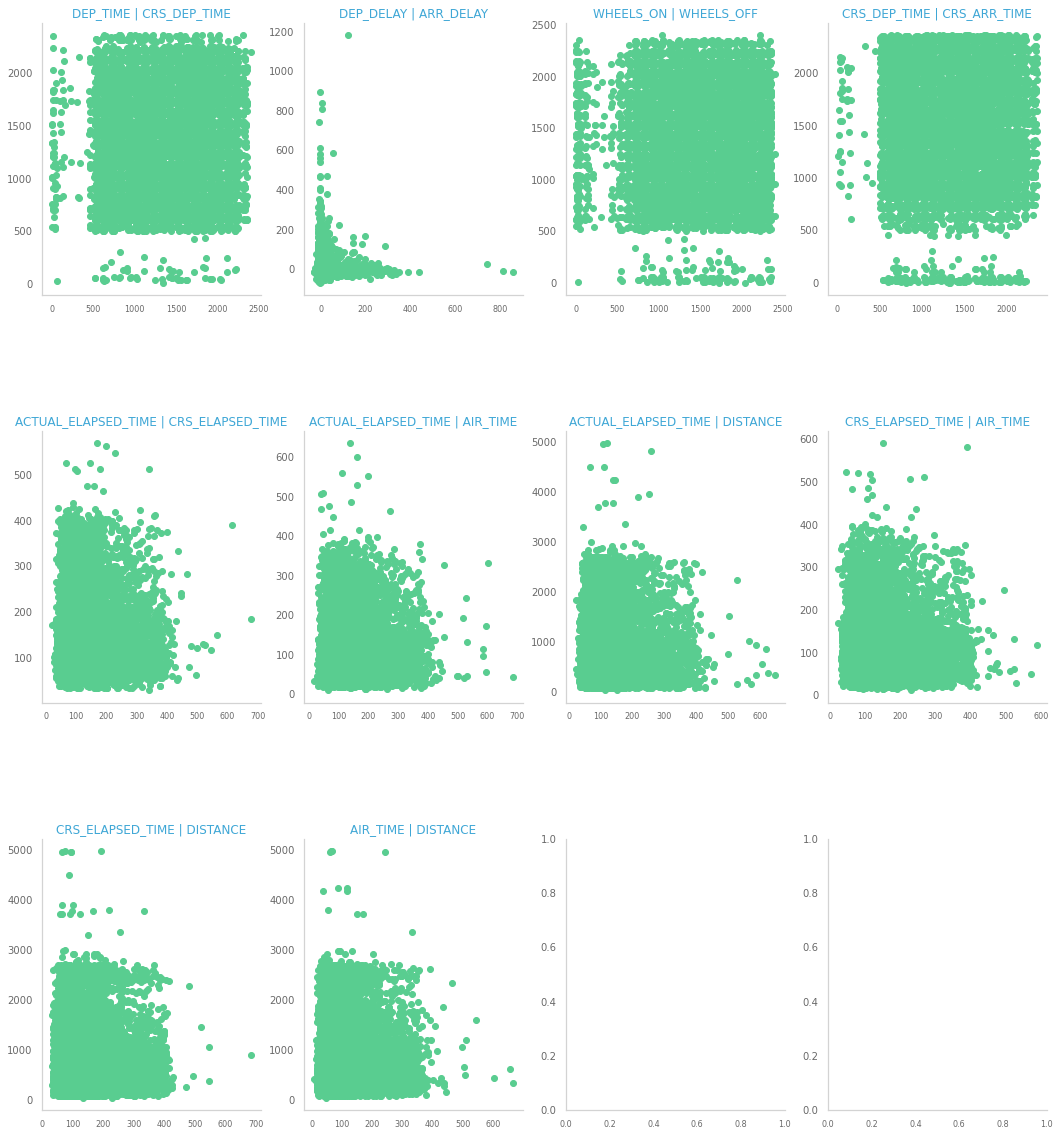

In [15]:
pairs=[['DEP_TIME','CRS_DEP_TIME'],
       ['DEP_DELAY','ARR_DELAY'],
       ['WHEELS_ON','WHEELS_OFF'],
       ['CRS_DEP_TIME','CRS_ARR_TIME'],
       ['ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME'],
       ['ACTUAL_ELAPSED_TIME','AIR_TIME'],
       ['ACTUAL_ELAPSED_TIME','DISTANCE'],
       ['CRS_ELAPSED_TIME','AIR_TIME'],
       ['CRS_ELAPSED_TIME','DISTANCE'],
       ['AIR_TIME','DISTANCE']]
      
plotPairs(plt,dfQuantitative,pairs,3,4)

On ne constate pas de correlation linéaire à priori

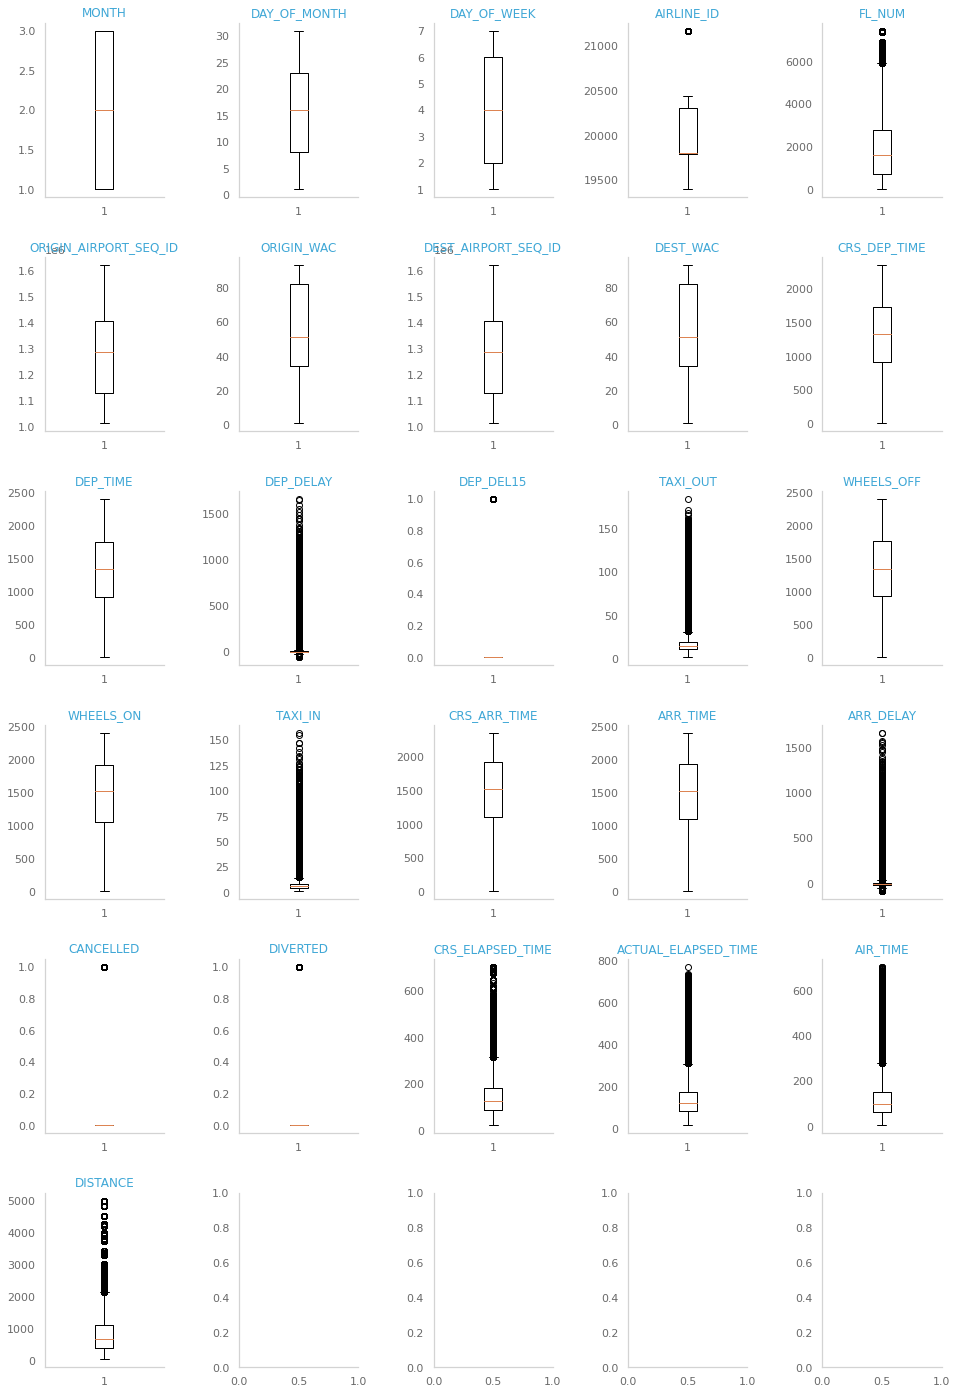

In [30]:
plotBoxes(plt,dfQuantitative,6,5)

Text(0.5, 1.0, 'ARR_DELAY')

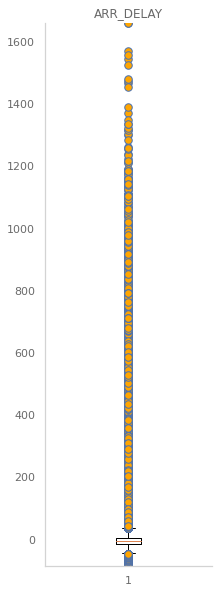

In [43]:
ymin=min(df['ARR_DELAY'])
ymax=max(df['ARR_DELAY'])
flierprops = dict(marker='.', markerfacecolor='orange', markersize=15,
                  linestyle='none', markeredgecolor='b')
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(3,10))
axes.set_ylim([ymin,ymax])
axes.boxplot(df['ARR_DELAY'].dropna(),flierprops=flierprops);
plt.title("ARR_DELAY")

On exclue les valeurs atypiques sur les retards

In [44]:
mask=maskOutliers(df['ARR_DELAY'])

In [45]:
dfCleaned['ARR_DELAY']=dfCleaned.loc[~mask]['ARR_DELAY']

Text(0.5, 1.0, 'ARR_DELAY')

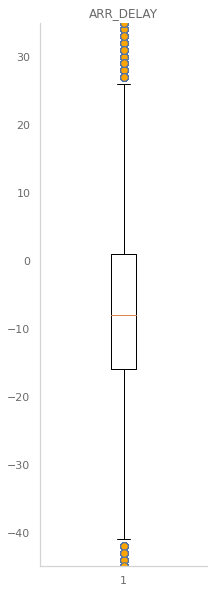

In [46]:
ymin=min(dfCleaned['ARR_DELAY'])
ymax=max(dfCleaned['ARR_DELAY'])
flierprops = dict(marker='.', markerfacecolor='orange', markersize=15,
                  linestyle='none', markeredgecolor='b')
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(3,10))
axes.set_ylim([ymin,ymax])
axes.boxplot(dfCleaned['ARR_DELAY'].dropna(),flierprops=flierprops);
plt.title("ARR_DELAY")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9056a84f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9056a74670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9056a84c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9056a74d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9056ac20d0>],
 'means': []}

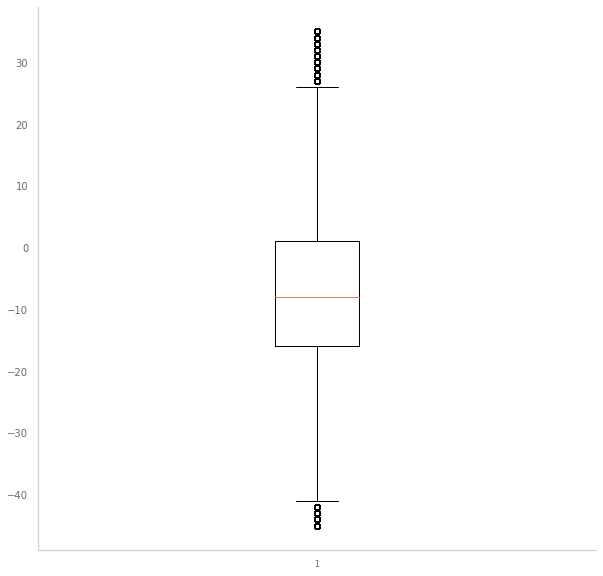

In [19]:
plt.boxplot(dfCleaned['ARR_DELAY'].dropna())

### <font color=#FFCB77>Creation de variables</font>

Créeons la variable indiquant le type de courrier du vol (long, moyen, court).  
De manière générale, les vols court-courriers sont d'une distance de l'ordre de 500 km (310 miles), les moyen-courriers concernent les vols dont la durée n'excède pas 3 h à 3 h 30 et dont la distance est inférieure à 5 000 km (3107 miles), et les vols long-courriers atteignent 15 000 km (9321 miles) de distance

In [20]:
# Creation des variables Court, Moyen, Long Courrier
# <500km (311 miles), <5000km (3107 miles), <15000km (9321 miles)
dfCleaned['SHORT_FLIGHT']=(dfCleaned['DISTANCE']<310).astype(int)
dfCleaned['MEDIUM_FLIGHT']=((dfCleaned['DISTANCE']>=310) & (dfCleaned['DISTANCE']<3107)).astype(int)
dfCleaned['LONG_FLIGHT']=((dfCleaned['DISTANCE']>=3107) & (dfCleaned['DISTANCE']<9321)).astype(int)

In [48]:
volsVilleOrigine=dfCleaned.groupby(['ORIGIN_CITY_NAME'])['FL_NUM'].count().sort_values(ascending=False)
volsVilleDestination=dfCleaned.groupby(['DEST_CITY_NAME'])['FL_NUM'].count().sort_values(ascending=False)

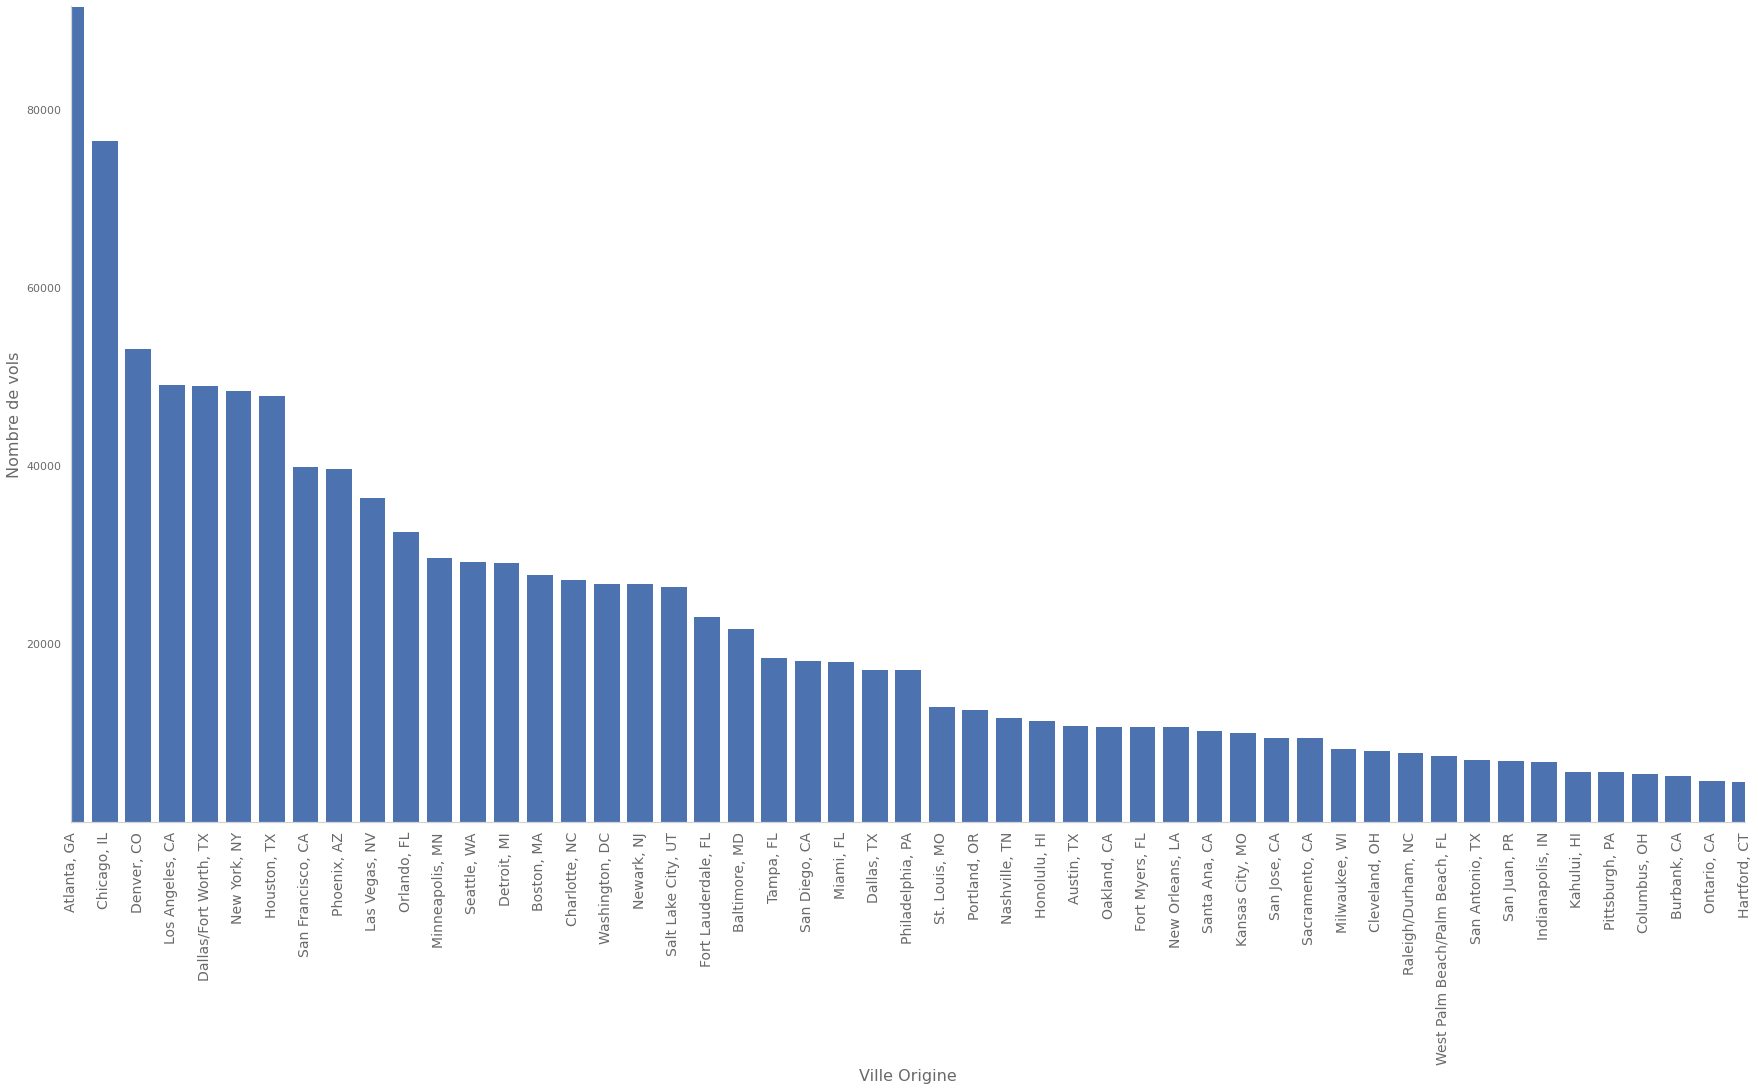

In [82]:
ymin=min(volsVilleOrigine.values)
ymax=max(volsVilleOrigine.values)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(30,15))
axes.set_ylim([ymin,ymax])
axes.set_xlim([0,50])

plt.bar(volsVilleOrigine.index,volsVilleOrigine.values);
plt.xticks(rotation=90,fontsize=14);
plt.xlabel('Ville Origine',fontsize=16);
plt.ylabel('Nombre de vols', fontsize=16);

In [23]:
# on ne garde que les villes qui ont plus de 2000 vols
filtreVilleOrigine=volsVilleOrigine[volsVilleOrigine>2000].index.values
filtreVilleDestination=volsVilleDestination[volsVilleDestination>2000].index.values

In [24]:
dfCleaned.shape

(1348838, 35)

In [25]:
dfCleaned=dfCleaned[(dfCleaned['ORIGIN_CITY_NAME'].isin(filtreVilleOrigine)) & (dfCleaned['DEST_CITY_NAME'].isin(filtreVilleDestination))]

In [26]:
dfCleaned.sample(50)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,ORIGIN_WAC,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,SHORT_FLIGHT,MEDIUM_FLIGHT,LONG_FLIGHT
921673,3,25,5,2016-03-25,DL,19790.0,DL,N816NW,1992.0,1320402.0,"Orlando, FL",33.0,1348702.0,"Minneapolis, MN",63.0,1820.0,1843.0,23.0,1.0,15.0,1858.0,2051.0,4.0,2054.0,2055.0,1.0,0.0,0.0,214.0,192.0,173.0,1310.0,0,1,0
529419,2,16,2,2016-02-16,UA,19977.0,UA,N76517,1869.0,1226603.0,"Houston, TX",74.0,1169704.0,"Fort Lauderdale, FL",33.0,1555.0,1858.0,183.0,1.0,13.0,1911.0,2205.0,7.0,1922.0,2212.0,NaN,0.0,0.0,147.0,134.0,114.0,966.0,0,1,0
138400,1,25,1,2016-01-25,NK,20416.0,NK,N625NK,534.0,1320402.0,"Orlando, FL",33.0,1104203.0,"Cleveland, OH",44.0,1533.0,1529.0,-4.0,0.0,16.0,1545.0,1746.0,9.0,1804.0,1755.0,-9.0,0.0,0.0,151.0,146.0,121.0,895.0,0,1,0
1166113,3,7,1,2016-03-07,OO,20304.0,OO,N979SW,5280.0,1129202.0,"Denver, CO",82.0,1483103.0,"San Jose, CA",91.0,1236.0,1242.0,6.0,0.0,15.0,1257.0,1406.0,4.0,1420.0,1410.0,-10.0,0.0,0.0,164.0,148.0,129.0,948.0,0,1,0
874012,3,5,6,2016-03-05,DL,19790.0,DL,N310DE,1091.0,1069302.0,"Nashville, TN",54.0,1039705.0,"Atlanta, GA",34.0,600.0,554.0,-6.0,0.0,29.0,623.0,759.0,7.0,805.0,806.0,1.0,0.0,0.0,65.0,72.0,36.0,214.0,1,0,0
334103,1,18,1,2016-01-18,EV,20366.0,EV,N14905,6027.0,1537002.0,"Tulsa, OK",73.0,1226603.0,"Houston, TX",74.0,625.0,615.0,-10.0,0.0,16.0,631.0,739.0,13.0,810.0,752.0,-18.0,0.0,0.0,105.0,97.0,68.0,429.0,0,1,0
1335561,3,23,3,2016-03-23,B6,20409.0,B6,N296JB,1011.0,1072102.0,"Boston, MA",13.0,1393004.0,"Chicago, IL",41.0,1616.0,1609.0,-7.0,0.0,13.0,1622.0,1749.0,16.0,1810.0,1805.0,-5.0,0.0,0.0,174.0,176.0,147.0,867.0,0,1,0
835564,2,19,5,2016-02-19,WN,19393.0,WN,N933WN,388.0,1169704.0,"Fort Lauderdale, FL",33.0,1082104.0,"Baltimore, MD",35.0,1400.0,1357.0,-3.0,0.0,12.0,1409.0,1624.0,10.0,1635.0,1634.0,-1.0,0.0,0.0,155.0,157.0,135.0,925.0,0,1,0
1205768,3,30,3,2016-03-30,OO,20304.0,OO,N122SY,5347.0,1477102.0,"San Francisco, CA",91.0,1537602.0,"Tucson, AZ",81.0,834.0,823.0,-11.0,0.0,19.0,842.0,1016.0,6.0,1045.0,1022.0,-23.0,0.0,0.0,131.0,119.0,94.0,751.0,0,1,0
978104,3,13,7,2016-03-13,EV,20366.0,EV,N608QX,5256.0,1387102.0,"Omaha, NE",65.0,1143302.0,"Detroit, MI",43.0,605.0,559.0,-6.0,0.0,14.0,613.0,847.0,10.0,907.0,857.0,-10.0,0.0,0.0,122.0,118.0,94.0,651.0,0,1,0


In [27]:
dfCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097760 entries, 0 to 1348837
Data columns (total 35 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   MONTH                  1097760 non-null  int64  
 1   DAY_OF_MONTH           1097760 non-null  int64  
 2   DAY_OF_WEEK            1097760 non-null  int64  
 3   FL_DATE                1097760 non-null  string 
 4   UNIQUE_CARRIER         1097760 non-null  string 
 5   AIRLINE_ID             1097760 non-null  float64
 6   CARRIER                1097760 non-null  string 
 7   TAIL_NUM               1091828 non-null  string 
 8   FL_NUM                 1097760 non-null  float64
 9   ORIGIN_AIRPORT_SEQ_ID  1097760 non-null  float64
 10  ORIGIN_CITY_NAME       1097760 non-null  string 
 11  ORIGIN_WAC             1097760 non-null  float64
 12  DEST_AIRPORT_SEQ_ID    1097760 non-null  float64
 13  DEST_CITY_NAME         1097760 non-null  string 
 14  DEST_WAC          

In [29]:
dfCleaned.to_csv('flights_cleaned_2000.csv',index=False)

In [30]:
elapsed=time.time()-start
print(f"- elapsed: {elapsed} secs")

- elapsed: 64.40132117271423 secs
